In [37]:
import pandas as pd
import numpy as np

In [ ]:
df2 = pd.read_csv('/content/cwfis_fwi2010s.csv')
df2.head()

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,opts,calcstatus
0,1012475,71031,2010-01-01 12:00:00,9.1,8.1,93.5,19.0,NaN,160,1002.95,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=RH:R:M=1:,-3
1,1012710,71798,2010-01-01 12:00:00,7.3,7.3,100.0,2.0,NaN,90,1002.10,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M=1:,-3
2,1014820,71774,2010-01-01 12:00:00,5.8,5.8,100.0,7.4,NaN,154,1003.00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=RH:WSD:R:M=1:,-3
3,1015630,71927,2010-01-01 12:00:00,4.8,4.0,95.0,7.0,NaN,160,1001.20,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=R:M=1:,-3
4,1016640,71778,2010-01-01 12:00:00,8.9,7.4,90.7,9.0,NaN,80,1002.78,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=T:RH:R:M=1:,-3


In [39]:
df2['fwi'].isna().sum()

np.int64(2143435)

In [40]:
wmo = pd.read_csv(r'isd-history.csv',encoding='latin1')
wmo.head()

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END
0,007018,99999,WXPOD 7018,NaN,NaN,NaN,0.00,0.000,7018.0,20110309,20130730
1,007026,99999,WXPOD 7026,AF,NaN,NaN,0.00,0.000,7026.0,20120713,20170822
2,007070,99999,WXPOD 7070,AF,NaN,NaN,0.00,0.000,7070.0,20140923,20150926
3,008260,99999,WXPOD8270,NaN,NaN,NaN,0.00,0.000,0.0,20050101,20120731
4,008268,99999,WXPOD8278,AF,NaN,NaN,32.95,65.567,1156.7,20100519,20120323


In [43]:
df1 = df1.rename(columns={'WBAN': 'wmo'})
df1

,CTRY,LAT,wmo,LON,ELEV(M)
0,NaN,0.000,99999,0.000,7018.0
1,AF,0.000,99999,0.000,7026.0
2,AF,0.000,99999,0.000,7070.0
3,NaN,0.000,99999,0.000,0.0
4,AF,32.950,99999,65.567,1156.7
...,...,...,...,...,...
29656,US,43.579,241,-90.913,394.1
29657,US,45.986,182,-95.992,367.3
29658,US,42.938,240,-85.061,249.0
29659,US,32.464,445,-87.954,34.1


In [45]:
print(wmo.columns)
wmo = wmo.rename(columns={'WBAN': 'wmo'})
df1 = wmo[['CTRY', 'LAT', 'wmo', 'LON', 'ELEV(M)']].copy()

Index(['USAF', 'wmo', 'STATION NAME', 'CTRY', 'STATE', 'ICAO', 'LAT', 'LON',
       'ELEV(M)', 'BEGIN', 'END'],
      dtype='object')


In [46]:
df1 = wmo[['CTRY','LAT','wmo','LON','ELEV(M)']]
df1

,CTRY,LAT,wmo,LON,ELEV(M)
0,NaN,0.000,99999,0.000,7018.0
1,AF,0.000,99999,0.000,7026.0
2,AF,0.000,99999,0.000,7070.0
3,NaN,0.000,99999,0.000,0.0
4,AF,32.950,99999,65.567,1156.7
...,...,...,...,...,...
29656,US,43.579,241,-90.913,394.1
29657,US,45.986,182,-95.992,367.3
29658,US,42.938,240,-85.061,249.0
29659,US,32.464,445,-87.954,34.1


In [47]:
df3 = pd.merge(df2,df1,on =['wmo'])
df3

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,bui,isi,fwi,dsr,opts,calcstatus,CTRY,LAT,LON,ELEV(M)
0,3185,3185,2011-04-29 12:00:00,10.0,-1.0,45.0,18.0,18.0,270,1018.78,...,13.7,4.1,5.2,0.5,M=1::ProvFwi,1,US,33.466,-111.721,423.3
1,3180,3180,2011-05-02 12:00:00,9.0,2.9,65.6,0.0,0.0,360,1013.02,...,15.4,1.5,1.6,0.1,M=1::ProvFwi,1,US,34.100,-117.783,308.2
2,3185,3185,2011-05-02 12:00:00,14.0,-1.0,33.0,22.0,22.0,90,1013.19,...,24.1,11.2,16.7,4.0,M=1::ProvFwi,1,US,33.466,-111.721,423.3
3,3174,3174,2011-05-03 12:00:00,8.5,4.6,76.4,11.0,11.0,315,1010.43,...,16.7,3.3,4.7,0.4,M=1::ProvFwi,1,US,33.803,-118.340,29.6
4,3174,3174,2011-05-03 12:00:00,8.5,4.6,76.4,11.0,11.0,315,1010.43,...,16.7,3.3,4.7,0.4,M=1::ProvFwi,1,US,33.800,-118.333,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50930,CPA,3145,2019-11-08 12:00:00,-5.9,-8.0,85.0,10.0,10.0,0,1014.84,...,0.2,1.1,0.2,0.0,M=1:ProvFwi,1,US,32.650,-114.617,64.9
50931,CPA,3145,2019-11-08 12:00:00,-5.9,-8.0,85.0,10.0,10.0,0,1014.84,...,0.2,1.1,0.2,0.0,M=1:ProvFwi,1,US,32.650,-114.617,64.9
50932,F3,3163,2019-11-08 12:00:00,-7.0,-9.0,80.0,2.0,2.0,0,1020.93,...,2.2,0.8,0.3,0.0,M=1:ProvFwi,1,US,37.612,-114.526,1332.9
50933,F3,3163,2019-11-08 12:00:00,-7.0,-9.0,80.0,2.0,2.0,0,1020.93,...,2.2,0.8,0.3,0.0,M=1:ProvFwi,1,US,37.612,-114.526,1333.2


In [48]:
df3.dropna(subset=['fwi'], inplace=True)

In [49]:
df3

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,bui,isi,fwi,dsr,opts,calcstatus,CTRY,LAT,LON,ELEV(M)
0,3185,3185,2011-04-29 12:00:00,10.0,-1.0,45.0,18.0,18.0,270,1018.78,...,13.7,4.1,5.2,0.5,M=1::ProvFwi,1,US,33.466,-111.721,423.3
1,3180,3180,2011-05-02 12:00:00,9.0,2.9,65.6,0.0,0.0,360,1013.02,...,15.4,1.5,1.6,0.1,M=1::ProvFwi,1,US,34.100,-117.783,308.2
2,3185,3185,2011-05-02 12:00:00,14.0,-1.0,33.0,22.0,22.0,90,1013.19,...,24.1,11.2,16.7,4.0,M=1::ProvFwi,1,US,33.466,-111.721,423.3
3,3174,3174,2011-05-03 12:00:00,8.5,4.6,76.4,11.0,11.0,315,1010.43,...,16.7,3.3,4.7,0.4,M=1::ProvFwi,1,US,33.803,-118.340,29.6
4,3174,3174,2011-05-03 12:00:00,8.5,4.6,76.4,11.0,11.0,315,1010.43,...,16.7,3.3,4.7,0.4,M=1::ProvFwi,1,US,33.800,-118.333,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50930,CPA,3145,2019-11-08 12:00:00,-5.9,-8.0,85.0,10.0,10.0,0,1014.84,...,0.2,1.1,0.2,0.0,M=1:ProvFwi,1,US,32.650,-114.617,64.9
50931,CPA,3145,2019-11-08 12:00:00,-5.9,-8.0,85.0,10.0,10.0,0,1014.84,...,0.2,1.1,0.2,0.0,M=1:ProvFwi,1,US,32.650,-114.617,64.9
50932,F3,3163,2019-11-08 12:00:00,-7.0,-9.0,80.0,2.0,2.0,0,1020.93,...,2.2,0.8,0.3,0.0,M=1:ProvFwi,1,US,37.612,-114.526,1332.9
50933,F3,3163,2019-11-08 12:00:00,-7.0,-9.0,80.0,2.0,2.0,0,1020.93,...,2.2,0.8,0.3,0.0,M=1:ProvFwi,1,US,37.612,-114.526,1333.2


In [51]:
df3['CTRY'].nunique()

2

In [53]:
df3['CTRY'].unique()

array(['US', 'GY'], dtype=object)

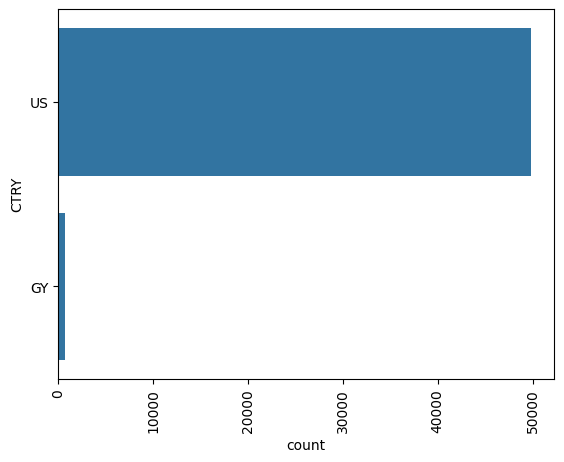

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y= 'CTRY', data = df3)
plt.xticks(rotation=90)   
plt.show()

In [59]:
countries = ['Canada', 'US', 'United Kingdom', 'GY', 'Spain']

dataset = df3[df3['CTRY'].isin(countries)]
dataset

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,bui,isi,fwi,dsr,opts,calcstatus,CTRY,LAT,LON,ELEV(M)
0,3185,3185,2011-04-29 12:00:00,10.0,-1.0,45.0,18.0,18.0,270,1018.78,...,13.7,4.1,5.2,0.5,M=1::ProvFwi,1,US,33.466,-111.721,423.3
1,3180,3180,2011-05-02 12:00:00,9.0,2.9,65.6,0.0,0.0,360,1013.02,...,15.4,1.5,1.6,0.1,M=1::ProvFwi,1,US,34.100,-117.783,308.2
2,3185,3185,2011-05-02 12:00:00,14.0,-1.0,33.0,22.0,22.0,90,1013.19,...,24.1,11.2,16.7,4.0,M=1::ProvFwi,1,US,33.466,-111.721,423.3
3,3174,3174,2011-05-03 12:00:00,8.5,4.6,76.4,11.0,11.0,315,1010.43,...,16.7,3.3,4.7,0.4,M=1::ProvFwi,1,US,33.803,-118.340,29.6
4,3174,3174,2011-05-03 12:00:00,8.5,4.6,76.4,11.0,11.0,315,1010.43,...,16.7,3.3,4.7,0.4,M=1::ProvFwi,1,US,33.800,-118.333,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50930,CPA,3145,2019-11-08 12:00:00,-5.9,-8.0,85.0,10.0,10.0,0,1014.84,...,0.2,1.1,0.2,0.0,M=1:ProvFwi,1,US,32.650,-114.617,64.9
50931,CPA,3145,2019-11-08 12:00:00,-5.9,-8.0,85.0,10.0,10.0,0,1014.84,...,0.2,1.1,0.2,0.0,M=1:ProvFwi,1,US,32.650,-114.617,64.9
50932,F3,3163,2019-11-08 12:00:00,-7.0,-9.0,80.0,2.0,2.0,0,1020.93,...,2.2,0.8,0.3,0.0,M=1:ProvFwi,1,US,37.612,-114.526,1332.9
50933,F3,3163,2019-11-08 12:00:00,-7.0,-9.0,80.0,2.0,2.0,0,1020.93,...,2.2,0.8,0.3,0.0,M=1:ProvFwi,1,US,37.612,-114.526,1333.2


In [ ]:
dataset.to_csv(r'Dataset_raw_FWI.csv', index=False)